In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [9]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


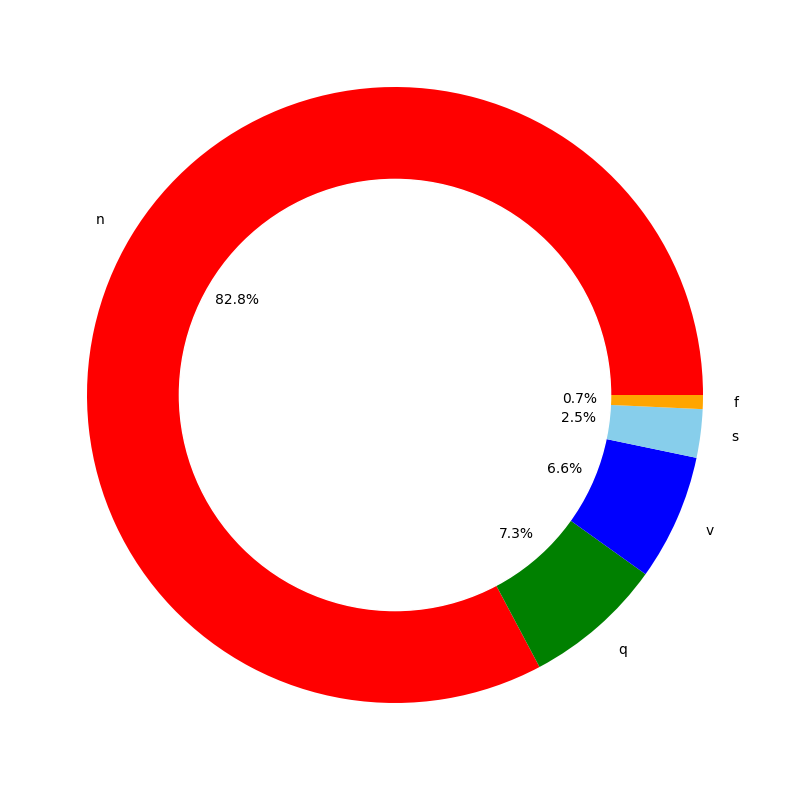

In [11]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
# -N : Non-ecotic beats (normal beat) -S : Supraventricular ectopic beats -V : Ventricular ectopic beats -F : Fusion Beats -Q : Unknown Beats

In [12]:


from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df_new=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [15]:
equilibre_new=train_df_new[187].value_counts()
print(equilibre_new)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


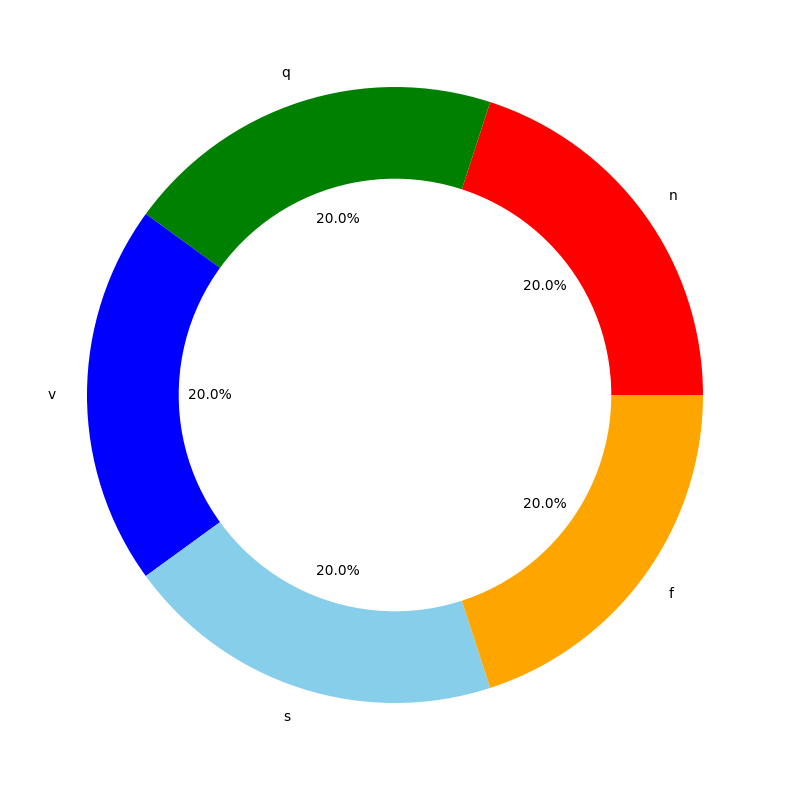

In [17]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre_new, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [20]:
# lets look at all the classes
c=train_df_new.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
67022,0.997976,0.910931,0.670040,0.467611,0.216599,0.062753,0.000000,0.016194,0.028340,0.074899,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73643,0.955224,0.919403,0.265672,0.000000,0.241791,0.298507,0.286567,0.277612,0.271642,0.271642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78187,1.000000,0.918919,0.853282,0.664093,0.478764,0.432432,0.432432,0.440154,0.463320,0.355212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81007,1.000000,0.842412,0.387160,0.227626,0.198444,0.192607,0.180934,0.177043,0.171206,0.177043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
85850,0.939394,0.818182,0.575758,0.351515,0.272727,0.284848,0.309091,0.300000,0.324242,0.300000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


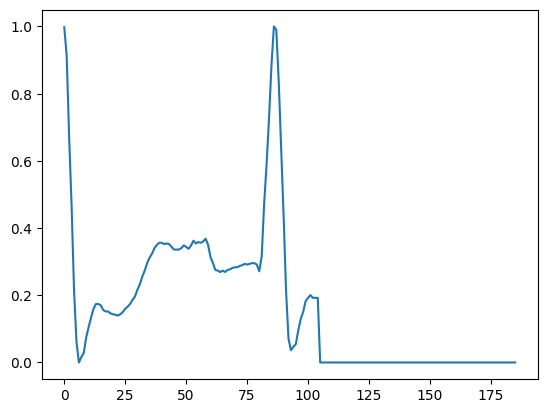

In [21]:
plt.plot(c.iloc[0,:186])

In [23]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

4710615
4710615


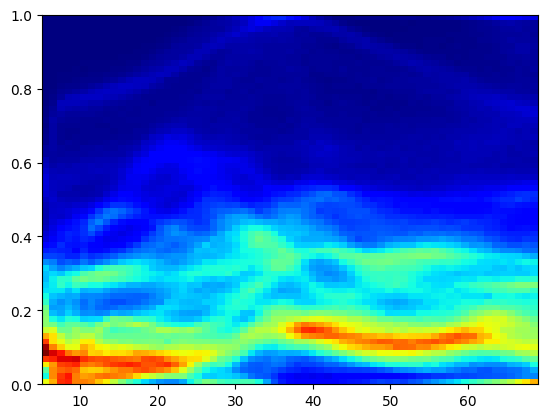

In [24]:
plot_hist(0,70,5,65)

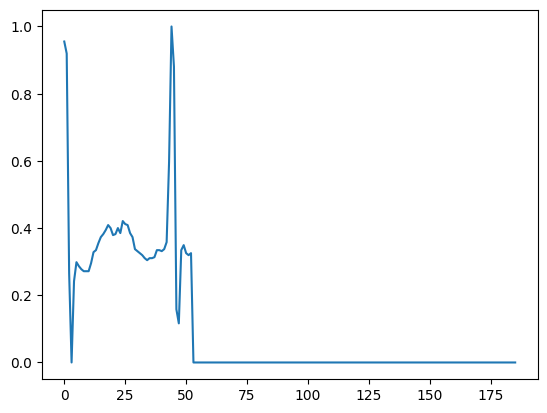

In [26]:
plt.plot(c.iloc[1,:186])


260460
260460


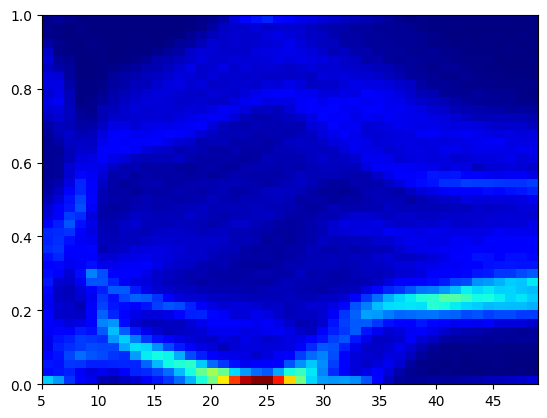

In [27]:
plot_hist(2,50,5,45)

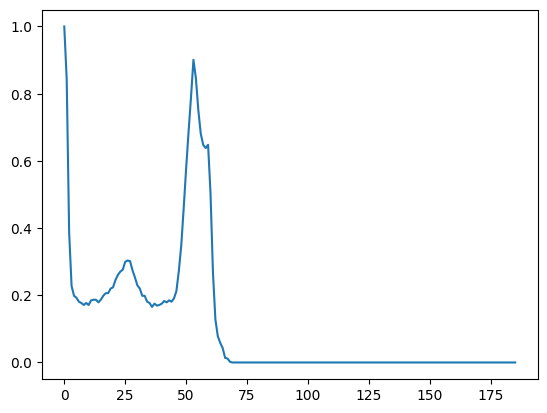

In [28]:
plt.plot(c.iloc[3,:186])


28845
28845


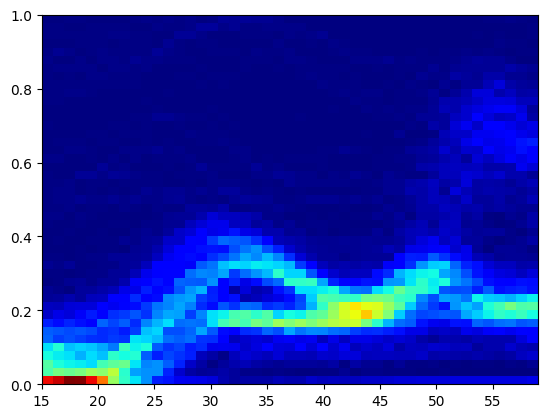

In [29]:
plot_hist(3,60,15,45)

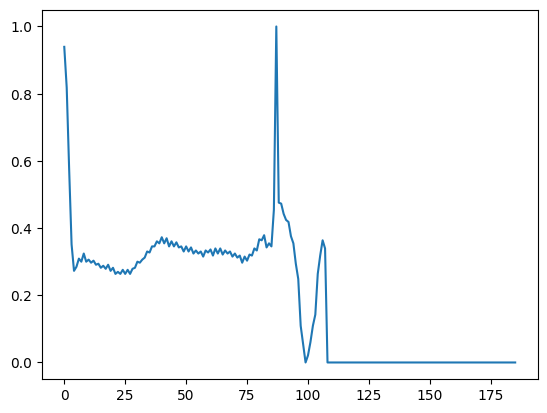

In [30]:
plt.plot(c.iloc[4,:186])

225085
225085


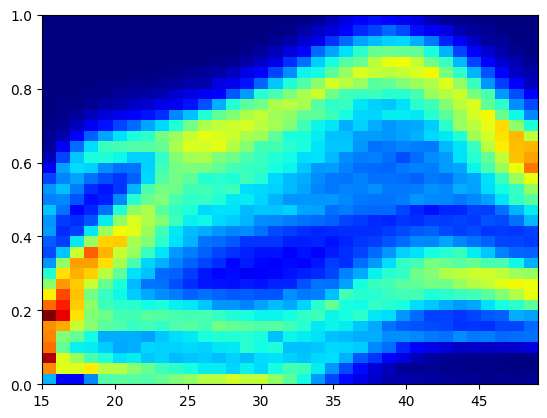

In [31]:
plot_hist(4,50,15,35)

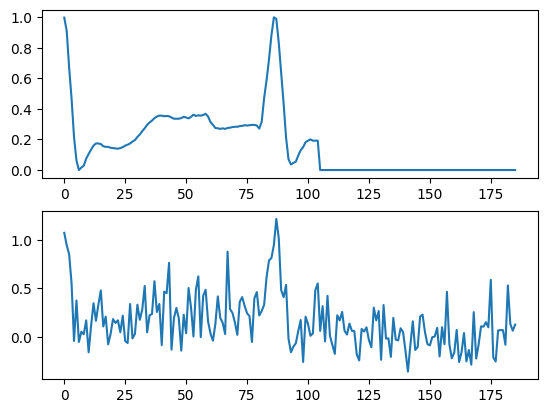

In [35]:
## add alittle gaussian noise 
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.2,186)
    return (signal+noise)

tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [36]:
target_train=train_df_new[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [37]:
X_train=train_df_new.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [41]:
# imports 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution1D, MaxPool1D, BatchNormalization, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping


def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
    
    return model, callbacks

    

In [ ]:
# convert the pytorch code to keras 
# weights = torch.tanh(self.first_linear(hidden_output))
# att_weights = self.second_linear(weights)
# att_weights = torch.nn.functional.softmax(att_weights, dim=1).transpose(1, 2)
# weighted_output = att_weights @ hidden_output
# logits = self.third_linear.weight.mul(weighted_output).sum(dim=2).add(self.third_linear.bias)
# return logits


In [42]:
model, callbacks = network(X_train,y_train,X_test,y_test) 

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 186, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 181, 64)           448       
                                                                 
 batch_normalization (BatchN  (None, 181, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 91, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 89, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 89, 64)           256   

In [44]:
history=model.fit(X_train, y_train,epochs=100,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))

Epoch 1/40
3125/3125 [==============================] - 48s 15ms/step - loss: 0.4598 - accuracy: 0.8312 - val_loss: 0.3842 - val_accuracy: 0.8725
Epoch 2/40
3125/3125 [==============================] - 43s 14ms/step - loss: 0.3278 - accuracy: 0.8781 - val_loss: 0.3277 - val_accuracy: 0.8862
Epoch 3/40
3125/3125 [==============================] - 45s 14ms/step - loss: 0.2870 - accuracy: 0.8942 - val_loss: 0.4449 - val_accuracy: 0.8257
Epoch 4/40
3125/3125 [==============================] - 48s 15ms/step - loss: 0.2592 - accuracy: 0.9032 - val_loss: 0.2551 - val_accuracy: 0.9113
Epoch 5/40
3125/3125 [==============================] - 49s 16ms/step - loss: 0.2357 - accuracy: 0.9119 - val_loss: 0.3461 - val_accuracy: 0.8630
Epoch 6/40
3125/3125 [==============================] - 54s 17ms/step - loss: 0.2159 - accuracy: 0.9198 - val_loss: 0.3417 - val_accuracy: 0.8772
Epoch 7/40
3125/3125 [==============================] - 47s 15ms/step - loss: 0.1990 - accuracy: 0.9249 - val_loss: 0.3256 -

In [56]:
from sklearn.metrics import precision_recall_fscore_support as score
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    # print(list(prediction))
    # print(list(y_true))
    cnf_matrix = confusion_matrix(y_true, prediction)
    precision, recall, fscore, support = score(list(y_true), list(prediction))

    print('precision: {}'.format(precision))
    print('recall:    {}'.format(recall))
    print('fscore:    {}'.format(fscore))

Accuracy: 86.51%


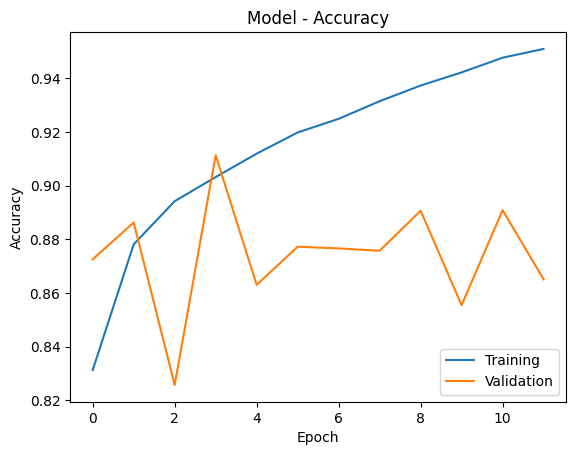

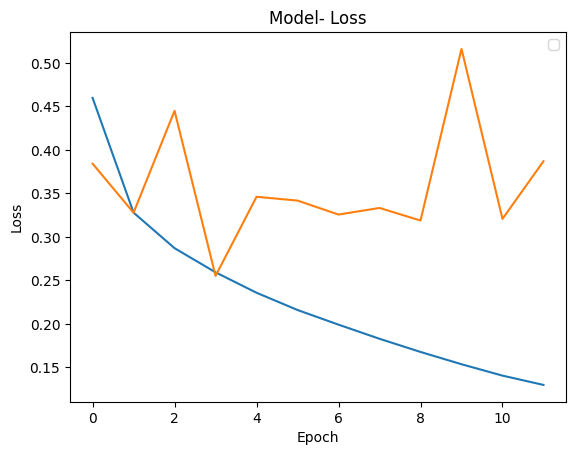

685/685 [==============================] - 3s 4ms/step
precision: [0.98844558 0.20551601 0.84295912 0.18204489 0.94559902]
recall:    [0.85461972 0.83093525 0.89709945 0.90123457 0.96206468]
fscore:    [0.91667407 0.32952924 0.86918702 0.30290456 0.95376079]


In [57]:
evaluate_model(history,X_test,y_test,model)
# y_pred=model.predict(X_test)


Normalized confusion matrix


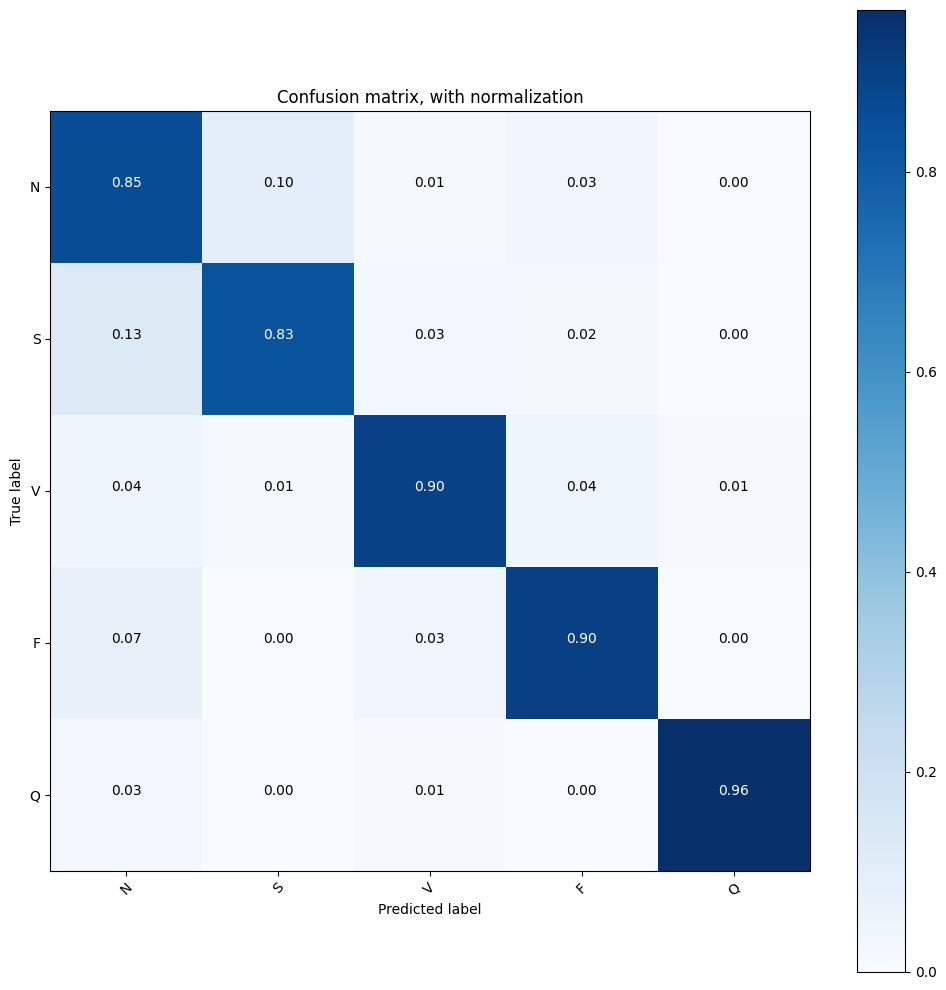

In [58]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()